# Introduction to Deep Learning:
## Lab Objectives
 we'll explore two fundamental types of machine learning tasks:  classification and regression using neural network.


### Classification Tasks
1. House-Price Dataset: A binary classification problem
2. Fashion MNIST: A multi-class image classification challenge
3. CIFAR-10: A more complex image classification dataset

### Regression Task
1. Boston House Pricing: Predicting house prices based on various features


# Neural Networks
A Neural Network is a method in Artificial Intelligence that teaches computers to process data in a way that is inspired by the ***human brain***. It is a type of machine learning process, called ***deep learning***, that uses interconnected ***nodes*** or ***neurons*** in a layered structure that resembles the human brain. It creates an ***adaptive system*** that computers use to ***learn from their mistakes and improve continuously***.





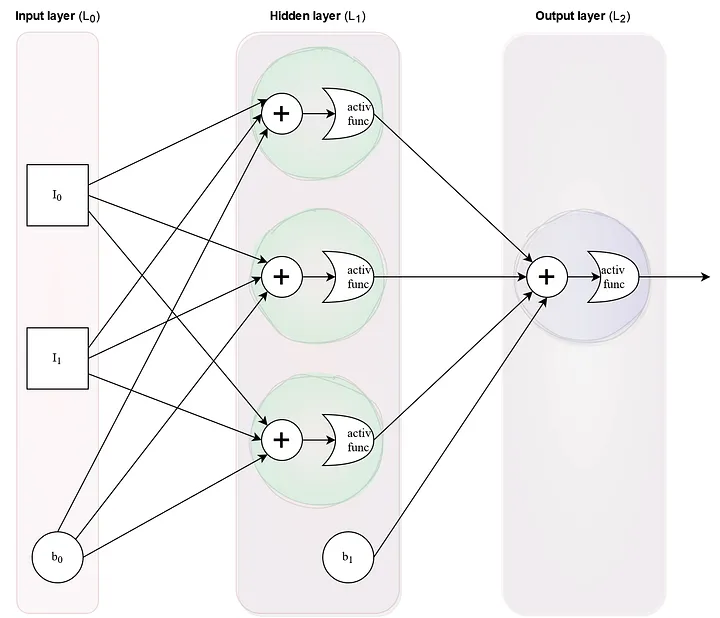

# Basics of MLP
- Objective: create vanilla neural networks (i.e., Multilayer perceptrons) for simple regression/classification tasks with Keras

## MLP Structures
- Each MLP model is consisted of one input layer, several hidden layers, and one output layer
- Number of neurons in each layer is not limited
<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" style="width: 300px"/>
<br>
<center>**MLP with one hidden layer**</center>
- Number of input neurons: 3
- Number of hidden neurons: 4
- Number of output neurons: 2


<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" style="width: 500px"/>
<br>
<center>**MLP with two hidden layers**</center>
- Number of input neurons: 3
- Number of hidden neurons: (4, 4)
- Number of output neurons: 1


# **1-MLP for classification tasks**
- When the target (**y**) is discrete (categorical)
- For loss function, cross-entropy is used and for evaluation metric, accuracy is commonly used

#1.1 Neural network model using keras sequential

In this example, we'll go through creating your very first neural network to predict whether the house price is below or above median value.

 **You simply need to download the dataset** [here](https://drive.google.com/file/d/1GfvKA0qznNVknghV4botnNxyH-KvODOC/view).


**LotArea:** Total lot area in square feet.

**OverallQual:** Overall material and finish quality of the house.

**OverallCond**: Overall condition of the house.

**TotalBsmtSF:** Total square footage of the basement.

**FullBath:** Number of full bathrooms.

**HalfBath:** Number of half bathrooms (a half bath usually has only a toilet and sink).

**BedroomAbvGr:** Number of bedrooms above ground level.

**TotRmsAbvGrd:** Total number of rooms above ground level (excluding bathrooms).

**Fireplaces:** Number of fireplaces in the house.

**GarageArea:** Square footage of the garage.

**AboveMedianPrice:** A binary feature (likely encoded as 0 or 1) indicating whether the price of the house is above the median value.

### Exploring and Processing the Data:


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [ ]:
X = df.drop(columns='AboveMedianPrice', axis=1)
y = df['AboveMedianPrice']

Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on X and transform X to the scaled version
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 70% training and 30% validation + test sets
X_train, X_val, Y_train, Y_val = train_test_split(
    X_scaled, y, test_size=0.3, random_state=1)

# Split the 30% validation + test set into 50% validation and 50% test
X_val, X_test, Y_val, Y_test = train_test_split(
    X_val, Y_val, test_size=0.5, random_state=1)

# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_val shape: {Y_val.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (1022, 10)
X_val shape: (219, 10)
X_test shape: (219, 10)
Y_train shape: (1022,)
Y_val shape: (219,)
Y_test shape: (219,)


### Building and Training Our First Neural Network

We will be using Keras to build our architecture

We will be using the **Sequential model**, which means that need to describe the layers above in sequence.

The first thing is to **ensure the input layer** has the right number of input features.

Fully connected layers are defined using the **Dense class**.

We can specify the number of neurons or nodes in the layer as the first argument, and specify the **activation function** using the activation argument.

In [ ]:
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Create the neural network model
model = Sequential()
# Input layer and first hidden layer (with ReLU activation)
model.add(keras.Input(shape = (10, )))
model.add(Dense(64, activation='relu'))
# Second hidden layer
model.add(Dense(32, activation='relu'))
# Output layer (assuming this is a binary classification task)
model.add(Dense(1, activation='sigmoid'))


OR
```
# from keras.models import Sequential
  from keras.layers import Dense,Input

model = Sequential([
    Input(shape=(10,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
```



 We have to configure the model by
- Telling it what algorithm you want to use to do the **optimization** (we'll use **adam**)
- Telling it what **loss function** to use (for **binary classification**, we will use binary cross entropy)
- Telling it what other **metrics** you want to track apart from the loss function (we want to track **accuracy** as well)


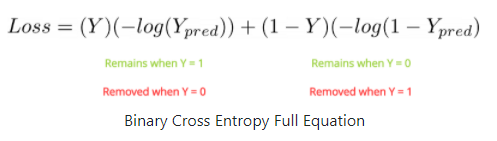

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Training on the data**:

 The function is called **'fit'** as we are fitting the parameters to the data.

  We specify:
- what data we are training on, which is **X_train and Y_train**
- the size of our **mini-batch**
- how long we want to train it for (**epochs**)
- what our **validation data** is so that the model will tell us how we are doing on the validation data at each point.

This function will output **a history**, which we save under the variable hist.

In [ ]:
history = model.fit(X_train, Y_train,
                    epochs = 50,
                    batch_size = 32,
                    validation_data=(X_val, Y_val))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5425 - loss: 0.6701 - val_accuracy: 0.6941 - val_loss: 0.6229
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7295 - loss: 0.6164 - val_accuracy: 0.7352 - val_loss: 0.5501
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8095 - loss: 0.5183 - val_accuracy: 0.8447 - val_loss: 0.4602
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8494 - loss: 0.4565 - val_accuracy: 0.8721 - val_loss: 0.4033
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8672 - loss: 0.3908 - val_accuracy: 0.8721 - val_loss: 0.3639
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8767 - loss: 0.3483 - val_accuracy: 0.8767 - val_loss: 0.3407
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8501 - loss: 0.3493 - val_accuracy: 0.8813 - val_loss: 0.3421
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8581 - loss: 0.3502 - val_accuracy: 0.8721 - val_loss:

Evaluating our data on the test set:

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_acc}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9171 - loss: 0.1859 
Test accuracy: 0.9178082346916199


In [ ]:
# Predict on test set and round predictions to 0 or 1
y_pred = (model.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import accuracy_score
# Calculate accuracy on the test set
accuracy = accuracy_score(Y_test, y_pred)
print(f"Test set accuracy: {accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Test set accuracy: 0.9178082191780822


###  Visualizing Loss and Accuracy

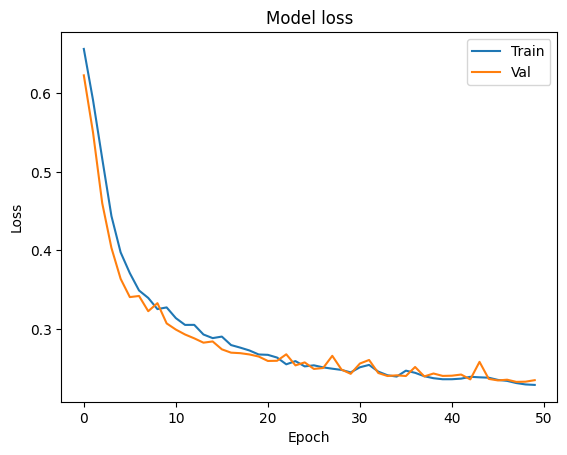

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

We can also visualize the training accuracy and the validation accuracy like this:

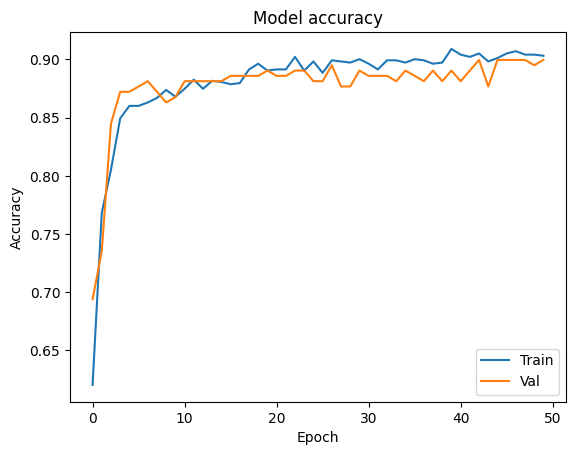

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### TRY with more complex Model

In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape = (10, )),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=50,
          validation_data=(X_val, Y_val))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7372 - loss: 0.5521 - val_accuracy: 0.8584 - val_loss: 0.3533
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8612 - loss: 0.3304 - val_accuracy: 0.8721 - val_loss: 0.3045
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8608 - loss: 0.3596 - val_accuracy: 0.8584 - val_loss: 0.3543
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.8700 - loss: 0.3349 - val_accuracy: 0.8904 - val_loss: 0.2701
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8823 - loss: 0.3060 - val_accuracy: 0.8493 - val_loss: 0.3105
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8566 - loss: 0.2882 - val_accuracy: 0.8904 - val_loss: 0.2458
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8982 - loss: 0.2576 - val_accuracy: 0.9087 - val_loss: 0.2432
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8950 - loss: 0.2385 - val_accuracy: 0.8904 - val_loss: 0.

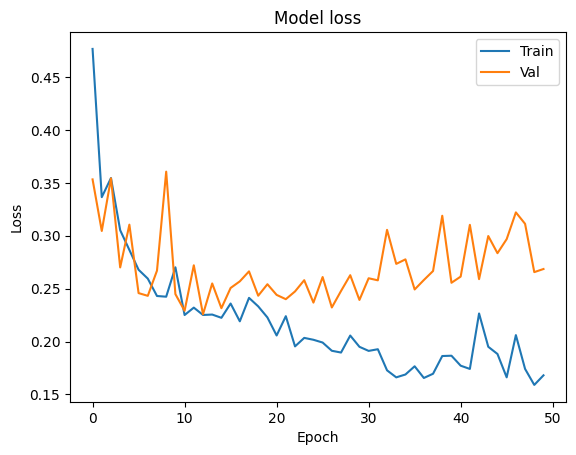

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

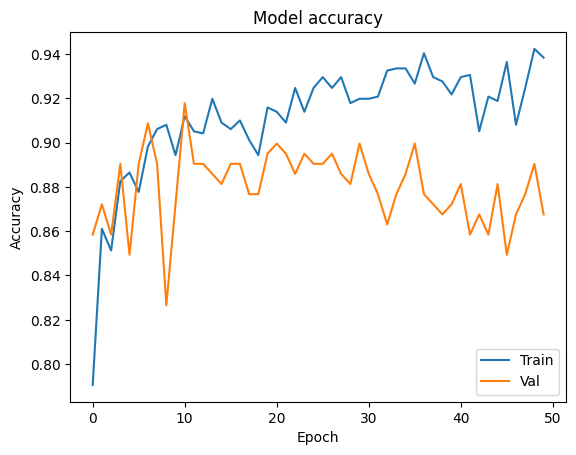

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# **Recommendations to address this overfitting:**

**1-Early Stopping:** Implement early stopping, halting training around epoch  when validation loss is at its minimum.

**2-Regularization:** Introduce or increase regularization techniques such as L1/L2 regularization, dropout, or batch normalization.

**3-Data Augmentation:** Enhance the diversity of the training set through appropriate data augmentation techniques.

**4-Model Complexity:** Consider simplifying the model architecture if it's too complex for the dataset size.

**5-Cross-Validation:** Implement k-fold cross-validation to ensure this isn't a quirk of a particular data split.

**6-Learning Rate Schedule:** Implement a learning rate decay schedule to fine-tune the model's learning in later epochs.

To address the overfitting we see in Model 2, we'll incorporate L2 regularization and dropout in our third model here (Model 3).

In [ ]:
from keras.layers import Dropout
from tensorflow.keras.regularizers import l2

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=l2(0.01), input_shape = (10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)),
])

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=50,
          validation_data=(X_val, Y_val))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.5139 - loss: 21.1143 - val_accuracy: 0.7626 - val_loss: 3.8920
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8084 - loss: 2.5004 - val_accuracy: 0.8402 - val_loss: 0.7143
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.8413 - loss: 0.6486 - val_accuracy: 0.8767 - val_loss: 0.4993
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8617 - loss: 0.5356 - val_accuracy: 0.8676 - val_loss: 0.4914
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.8706 - loss: 0.5136 - val_accuracy: 0.8493 - val_loss: 0.5222
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8501 - loss: 0.5057 - val_accuracy: 0.8813 - val_loss: 0.4675
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8574 - loss: 0.5015 - val_accuracy: 0.8721 - val_loss: 0.4593
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.8876 - loss: 0.4717 - val_accuracy: 0.8676 - 

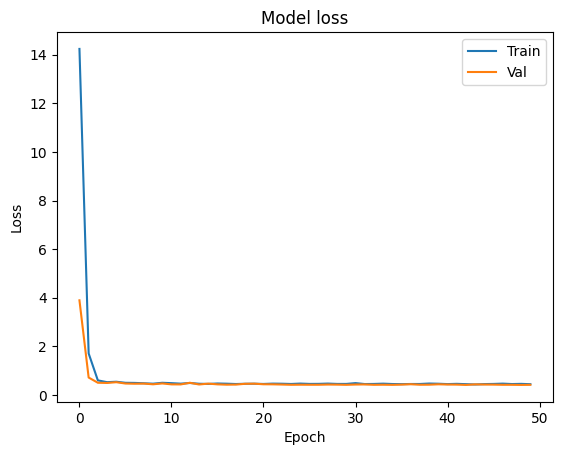

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

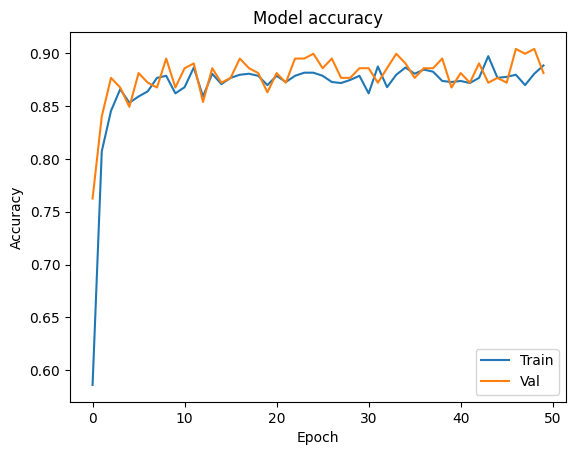

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

As compared to Model 2, you should see that there's less overfitting!

#1.2 Fashoin MNIST

the **Fashion MNIST datase**t consists of **grayscale** images. Each image in the dataset is:

**28 x 28** pixels in size
Contains only 1 channel (grayscale), meaning the pixel values range from 0 to 255, where **0 represents black** and **255 represents white**, with shades of gray in between.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)
print(test_images.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# Assuming train_labels is a NumPy array
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10) # One-hot encode the labels
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

 Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

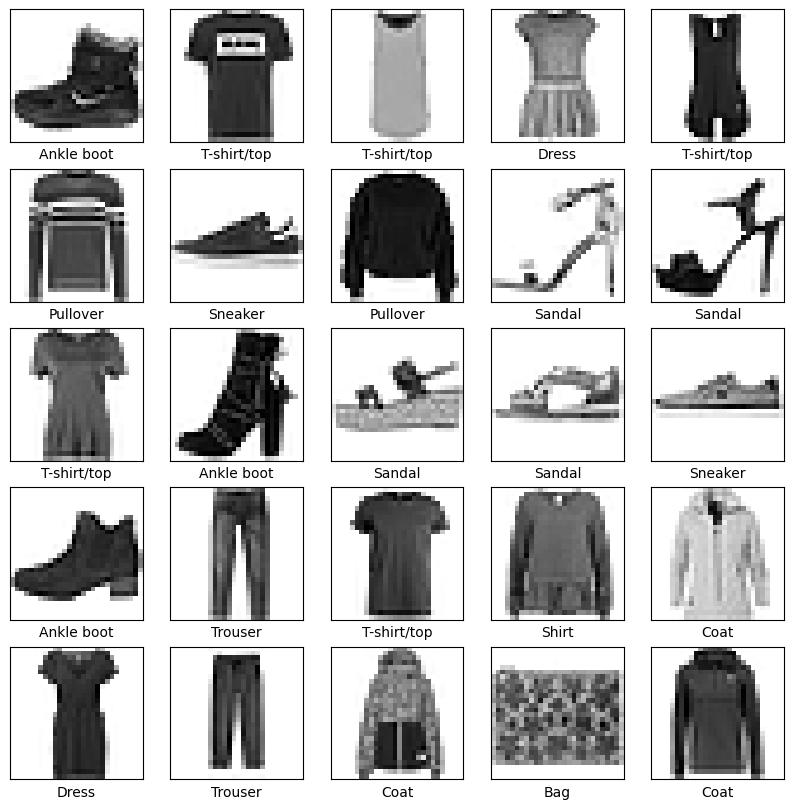

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.where(train_labels[i] == 1.)[0][0]])
plt.show()

Scale these values to **a range of 0 to 1** before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Build the model


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Softmax for multi-class classification
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Check the shape of your train_labels
print(train_labels.shape)

(60000, 10)


In [ ]:
# Train the model
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7767 - loss: 0.6449
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8597 - loss: 0.3902
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8732 - loss: 0.3448
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8838 - loss: 0.3169
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8903 - loss: 0.2959
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8992 - loss: 0.2747
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9031 - loss: 0.2616
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9044 - loss: 0.2552
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9073 - loss: 0.2461
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9128 - loss: 0.2343
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9156 - loss: 0.2267
Epoch 12/50
1875/1875 ━━━━━━

### Evaluate accuracy

In [ ]:
# Assuming train_labels is a NumPy array
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10) # One-hot encode the labels
test_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8824 - loss: 0.5242

Test accuracy: 0.8823999762535095


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

### Add Dropout - Appropriate Learning rate
![download (4)](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/04/1IrdJ5PghD9YoOyVAQ73MJw.gif)


In [ ]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=32),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=64),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=10, activation="softmax"),
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_2.compile(loss="categorical_crossentropy",
                metrics=["accuracy"],
                optimizer=optimizer)

model_2.summary()

history_2 = model_2.fit(train_images, train_labels,
                    epochs=50)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,882 (108.91 KB)

 Trainable params: 27,882 (108.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6964 - loss: 0.8587
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8204 - loss: 0.5013
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8350 - loss: 0.4651
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8380 - loss: 0.4462
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8424 - loss: 0.4352
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8459 - loss: 0.4291
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8489 - loss: 0.4184
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8478 - loss: 0.4145
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8515 - loss: 0.4101
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8544 - loss: 0.4058
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8561 - loss: 0.4046
Epoch 12/50
1875/1875 ━━━━━━━━

In [ ]:
test_loss, test_acc = model_2.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8641 - loss: 0.3856

Test accuracy: 0.8640999794006348


# **1.3 Cifar Dataset**

### Dataset Description
- CIFAR-10 dataset contains **60,000 images **in 10 classes - 50,000 for training and 10,000 for testing

- For more information, refer to [this Wikipedia article](https://en.wikipedia.org/wiki/CIFAR-10) or [Alex Krizhevsky's web site](https://www.cs.toronto.edu/~kriz/cifar.html)

![download (4)](https://www.kdnuggets.com/wp-content/uploads/garg_building_training_first_neural_network_tensorflow_keras_7.png)


In [ ]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


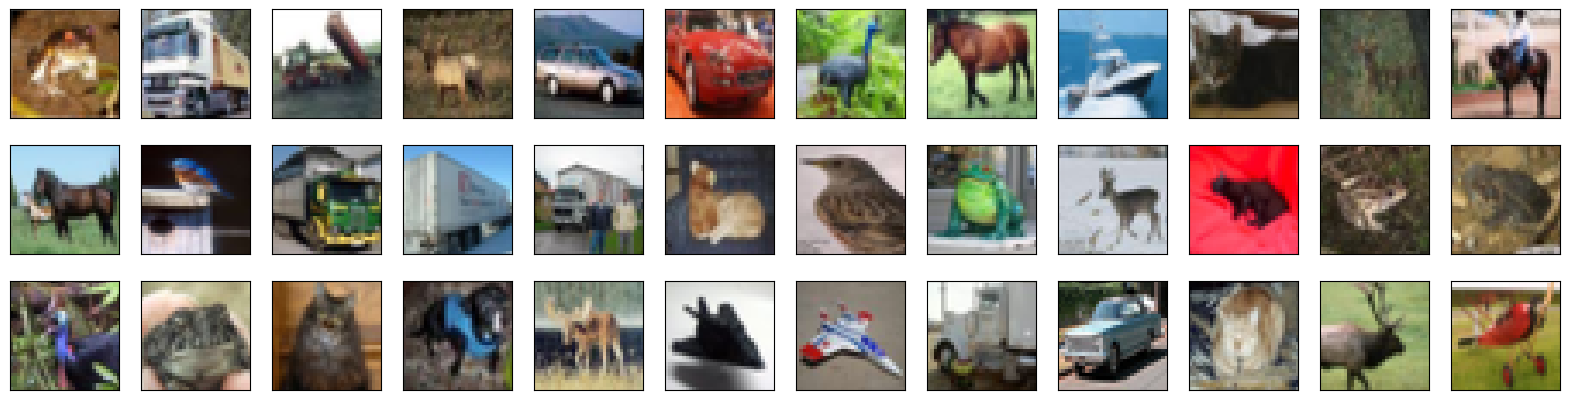

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

Rescale the Images by Dividing Every Pixel in Every Image by 255


In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

Break Dataset into Training, Testing, and Validation Sets

In [ ]:
# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


Define the Model Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:])) #input_shape = (32, 32, 3)
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1000)                │       3,073,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 512)                 │         512,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,590,642 (13.70 MB)

 Trainable params: 3,590,642 (13.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

hist = model.fit(x_train, y_train, batch_size=32, epochs=50,
          validation_data=(x_valid, y_valid),
          verbose=2, shuffle=True)

Epoch 1/50
1407/1407 - 66s - 47ms/step - accuracy: 0.2753 - loss: 1.9896 - val_accuracy: 0.3464 - val_loss: 1.8329
Epoch 2/50
1407/1407 - 80s - 57ms/step - accuracy: 0.3275 - loss: 1.8458 - val_accuracy: 0.3834 - val_loss: 1.7299
Epoch 3/50
1407/1407 - 82s - 58ms/step - accuracy: 0.3456 - loss: 1.8026 - val_accuracy: 0.3834 - val_loss: 1.7180
Epoch 4/50
1407/1407 - 64s - 46ms/step - accuracy: 0.3560 - loss: 1.7733 - val_accuracy: 0.4104 - val_loss: 1.6907
Epoch 5/50
1407/1407 - 82s - 58ms/step - accuracy: 0.3640 - loss: 1.7562 - val_accuracy: 0.4066 - val_loss: 1.6835
Epoch 6/50
1407/1407 - 63s - 45ms/step - accuracy: 0.3687 - loss: 1.7436 - val_accuracy: 0.3900 - val_loss: 1.7077
Epoch 7/50
1407/1407 - 82s - 58ms/step - accuracy: 0.3767 - loss: 1.7303 - val_accuracy: 0.3950 - val_loss: 1.6803
Epoch 8/50
1407/1407 - 63s - 45ms/step - accuracy: 0.3794 - loss: 1.7194 - val_accuracy: 0.4104 - val_loss: 1.6832
Epoch 9/50
1407/1407 - 81s - 58ms/step - accuracy: 0.3836 - loss: 1.7092 - val_a

In [ ]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.4334999918937683


# **Lab Practice**

# **2-MLP for Regression tasks**
- When the target (**y**) is continuous (real)
- For loss function and evaluation metric, mean squared error (MSE) is commonly used

1. Use **Boston housing dataset** which has total 506 data instances (404 training & 102 test),  13 attributes (features) to predict "the median values of the houses at a location"

 https://keras.io/datasets/


```
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
```

2. Build & train a neural network, try to improve it by applying the tips above



In [ ]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

model = Sequential()
model.add(Dense(10, input_shape = (13,)))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('sigmoid'))
model.add(Dense(1))

sgd = optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mse'])
model.fit(X_train, y_train, batch_size = 32, epochs = 50)

results = model.evaluate(X_test, y_test)

print('loss: ', results[0])
print('mse: ', results[1])


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 363.8528 - mse: 363.8528  
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 86.1251 - mse: 86.1251 
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93.5773 - mse: 93.5773   
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75.6495 - mse: 75.6495 
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76.3753 - mse: 76.3753 
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 84.5377 - mse: 84.5377 
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 82.8441 - mse: 82.8441 
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92.4597 - mse: 92.4597   
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 81.5971 - mse: 81.5971 
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 85.1967 - mse: 85.1967    
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 86.1584 - mse: 86.1584    
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━

# **Referecens:**

https://www.tensorflow.org/tutorials/keras/classification

https://gpttutorpro.com/keras-and-tensorflow-mastery-building-your-first-neural-network/

https://keras.io/api/models/sequential/#sequential-class

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/